13.4, 13.5, 13.7, 13.9, 13.10

# **선형 판별분석과 이차 판별분석**

판별분석 Discriminant Analysis
- 로지스틱 회귀분석처럼 질적 척도로 이루어진 종속변수를 분류할 때 쓰이는 분석 기법.
- 기계학습보다는 통계 기반의 데이터 분류 모델에 더 가깝다.

**일반 판별분석 / 두 집단 판별분석 Two-group Discriminant Analysis**
- 종속 변수의 범주가 두 개일 경우
**다중 판별분석 Multiple Discriminant Analysis**
- 범주가 세 개 이상일 경우

범주를 구분하는 결정경계선을 산출하는 방식에 따라 **선형판별분석(LDA: Linear Discriminant Analysis)**과 **이차판별분석(QDA: Quadratic Discriminant Analysis)**로 구분된다.

**선형 판별분석 LDA**

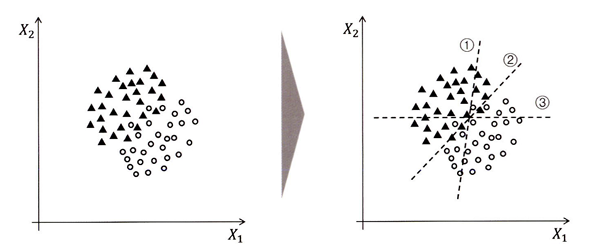

**이차 판별분석 QDA**

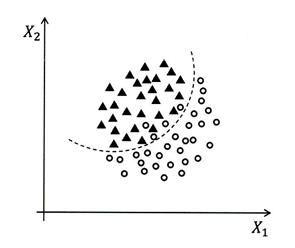

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
# 성별 분포 시각화 (키 X 몸무게)
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

print(df_man.head())
print(df_woman.head())

    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  
     age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
5   36.0      F      165.

<ipython-input-7-5e7a197713d7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues',
<ipython-input-7-5e7a197713d7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds',


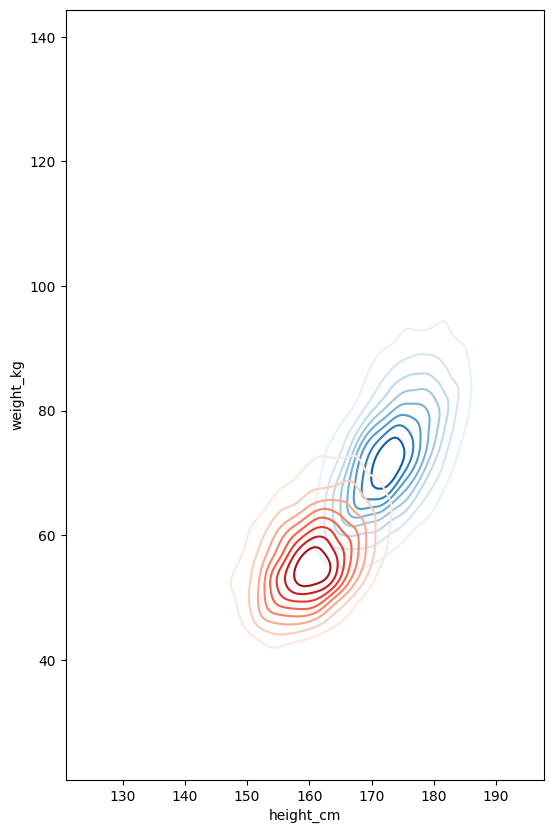

In [7]:
# 그래프 설정
f, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

# 가로길이, 세로길이 변수 축 설정
ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues',
                 shade=False, thresh=False, cbar=False)
ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds',
                 shade=False, thresh=False, cbar=False)

red = sns.color_palette('Reds')[-2]
blue = sns.color_palette('Blues')[-2]

In [10]:
# 독립변수 정규화

# 독립변수와 종속변수로 분리
df_x = df.drop(['gender', 'age', 'class'], axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [11]:
# train dataset과 test dataset을 분리하여 생성 (7:3)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=10)

print(len(x_train))
print(len(x_test))

9375
4018


In [12]:
# 선형 판별 분석 모델 적용
LDA1 = LinearDiscriminantAnalysis(store_covariance=True)
LDA1.fit(x_train, y_train)
y_train_pred = LDA1.predict(x_train)
y_test_pred = LDA1.predict(x_test)

# train dataset accuracy
print(accuracy_score(y_train, y_train_pred))
# test dataset accuracy
print(accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9784533333333333
0.9810851169736187


In [13]:
# 선형 판별 분석 모델 상수와 계숫값 출력
print('intercept: ', LDA1.intercept_)
print('coefficient: ', LDA1.coef_)

intercept:  [-14.29894437]
coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-14-ff011f6d89d2>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
<ipython-input-14-ff011f6d89d2>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

<Axes: xlabel='lda_component'>

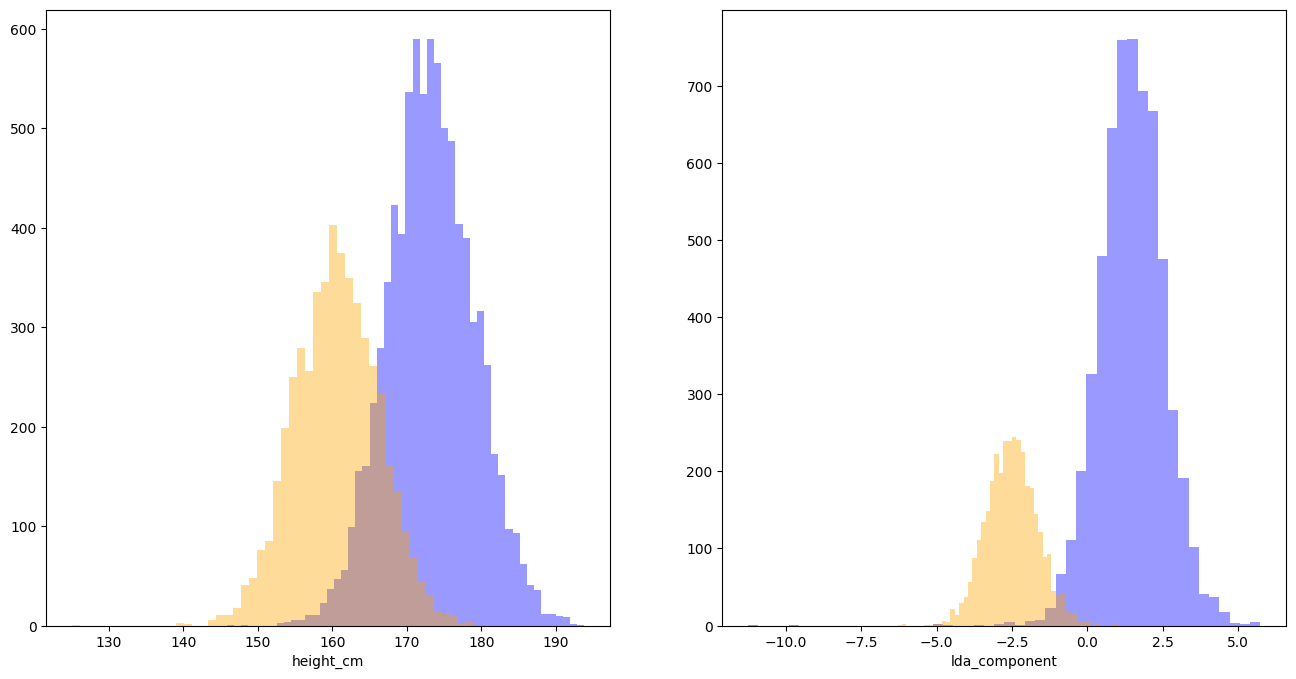

In [14]:
# 선형 판별분석 차원축소 적용

# 주성분 1개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com, columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
             hist=True, kde=False, color='blue', label='man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'],
             hist=True, kde=False, color='orange', label='woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'],
             hist=True, kde=False, color='blue', label='man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'],
             hist=True, kde=False, color='orange', label='woman', ax=axs[1])

In [16]:
# 이차 판별분석 모델 적용
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train)
qda_y_train_pred = qda.predict(x_train)
qda_y_test_pred = qda.predict(x_test)

print(accuracy_score(y_train, qda_y_train_pred))
print(accuracy_score(y_test, qda_y_test_pred))

0.98048
0.9798407167745147


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# 이차 판별분석 모델 성능 리포트 출력
print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018



# **서포트벡터머신 SVM**

In [18]:
import sklearn.svm as svm
from sklearn.svm import SVC

In [19]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [20]:
# 독립변수 정규화
df_x = df.drop(['Area', 'Class'], axis=1)
df_y = df[['Class']]

# 데이터 정규화
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [22]:
# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print(len(x_train))
print(len(x_test))

540
360


In [25]:
# 선형 SVM 모델 성능 확인

# 3차항, 학습 반복 횟수 10000 설정
svm_model = SVC(kernel='linear', degree=3, gamma='auto', C=10, max_iter=10000)

svm_model.fit(x_train, y_train)

print(svm_model.score(x_train, y_train))
print(svm_model.score(x_test, y_test))

0.8648148148148148
0.8638888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# SVM C값 1~30에 따른 모델 성능 확인

scores=[]
for c in [*range(1, 31)]:
  svc = SVC(kernel='rbf', C=c, max_iter=10000)
  C_model = svc.fit(x_train, y_train)
  train_score = C_model.score(x_train, y_train)
  test_score = C_model.score(x_test, y_test)
  print("rbf SVM : C: {}, train set score:{:2f}, test set score:{:2f}".format(c, train_score, test_score))
  scores.append([train_score, test_score])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 1, train set score:0.857407, test set score:0.883333
rbf SVM : C: 2, train set score:0.864815, test set score:0.880556
rbf SVM : C: 3, train set score:0.862963, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 4, train set score:0.861111, test set score:0.880556
rbf SVM : C: 5, train set score:0.861111, test set score:0.880556
rbf SVM : C: 6, train set score:0.862963, test set score:0.883333
rbf SVM : C: 7, train set score:0.866667, test set score:0.883333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 8, train set score:0.864815, test set score:0.883333
rbf SVM : C: 9, train set score:0.864815, test set score:0.883333
rbf SVM : C: 10, train set score:0.864815, test set score:0.891667
rbf SVM : C: 11, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 12, train set score:0.862963, test set score:0.891667
rbf SVM : C: 13, train set score:0.864815, test set score:0.891667
rbf SVM : C: 14, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 15, train set score:0.864815, test set score:0.897222
rbf SVM : C: 16, train set score:0.864815, test set score:0.891667
rbf SVM : C: 17, train set score:0.864815, test set score:0.891667
rbf SVM : C: 18, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 19, train set score:0.864815, test set score:0.891667
rbf SVM : C: 20, train set score:0.864815, test set score:0.891667
rbf SVM : C: 21, train set score:0.864815, test set score:0.888889
rbf SVM : C: 22, train set score:0.864815, test set score:0.883333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 23, train set score:0.864815, test set score:0.883333
rbf SVM : C: 24, train set score:0.862963, test set score:0.886111
rbf SVM : C: 25, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 26, train set score:0.861111, test set score:0.886111
rbf SVM : C: 27, train set score:0.861111, test set score:0.886111
rbf SVM : C: 28, train set score:0.861111, test set score:0.886111
rbf SVM : C: 29, train set score:0.861111, test set score:0.886111
rbf SVM : C: 30, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


`gamma` 매개변수값을 0.1\~20으로 바꿔가며 성능을 확인한다.
`gamma` 값은 이 데이터셋에서는 정확도에 큰 변화가 없지만 5~10정도에서 높은 정확도를 보이는 것을 알 수 있다.

# **시계열 분석** (예측모델)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00


In [35]:
df = pd.read_csv('walmart_cleaned.csv')
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [36]:
# 주별 매출 집계 테이블 생성

# date 칼럼 날짜 형식 변환
df['Date2'] = pd.to_datetime(df['Date'])
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

# 집계 칼럼 함수 설정
def func(df):
  df_sum = {}
  df_sum['Weekly_Sales'] = df['Weekly_Sales'].sum()
  df_sum['Temperature'] = df['Temperature'].mean()
  df_sum['Fuel_Price'] = df['Fuel_Price'].mean()
  df_sum['IsHoliday'] = df['IsHoliday'].max()
  df_sum['CPI'] = df['CPI'].mean()
  df_sum['Unemployment'] = df['Unemployment'].mean()
  return pd.Series(df_sum, index=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'IsHoliday', 'CPI', 'Unemployment'])


# 집계 테이블 생성
df_agg = df.groupby(['Year', 'Date2']).apply(func).reset_index()

df_agg.head()

<ipython-input-36-0f9b937abc57>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['Year', 'Date2']).apply(func).reset_index()


,Year,Date2,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
0,2010,2010-02-05,26842324.87,33.783804,2.694795,0.0,174.123337,8.234718
1,2010,2010-02-12,25812206.72,33.451490,2.672217,1.0,174.113619,8.219811
2,2010,2010-02-19,25707151.62,37.246745,2.650185,0.0,174.144192,8.233243
3,2010,2010-02-26,23530977.13,38.488821,2.667389,0.0,174.301025,8.227063
4,2010,2010-03-05,24998365.51,42.700910,2.715568,0.0,174.510657,8.236331


시계열 분석을 위해 지점별 매출액을 통합하여 일자별 월마트 전체 매출로 집계한다.

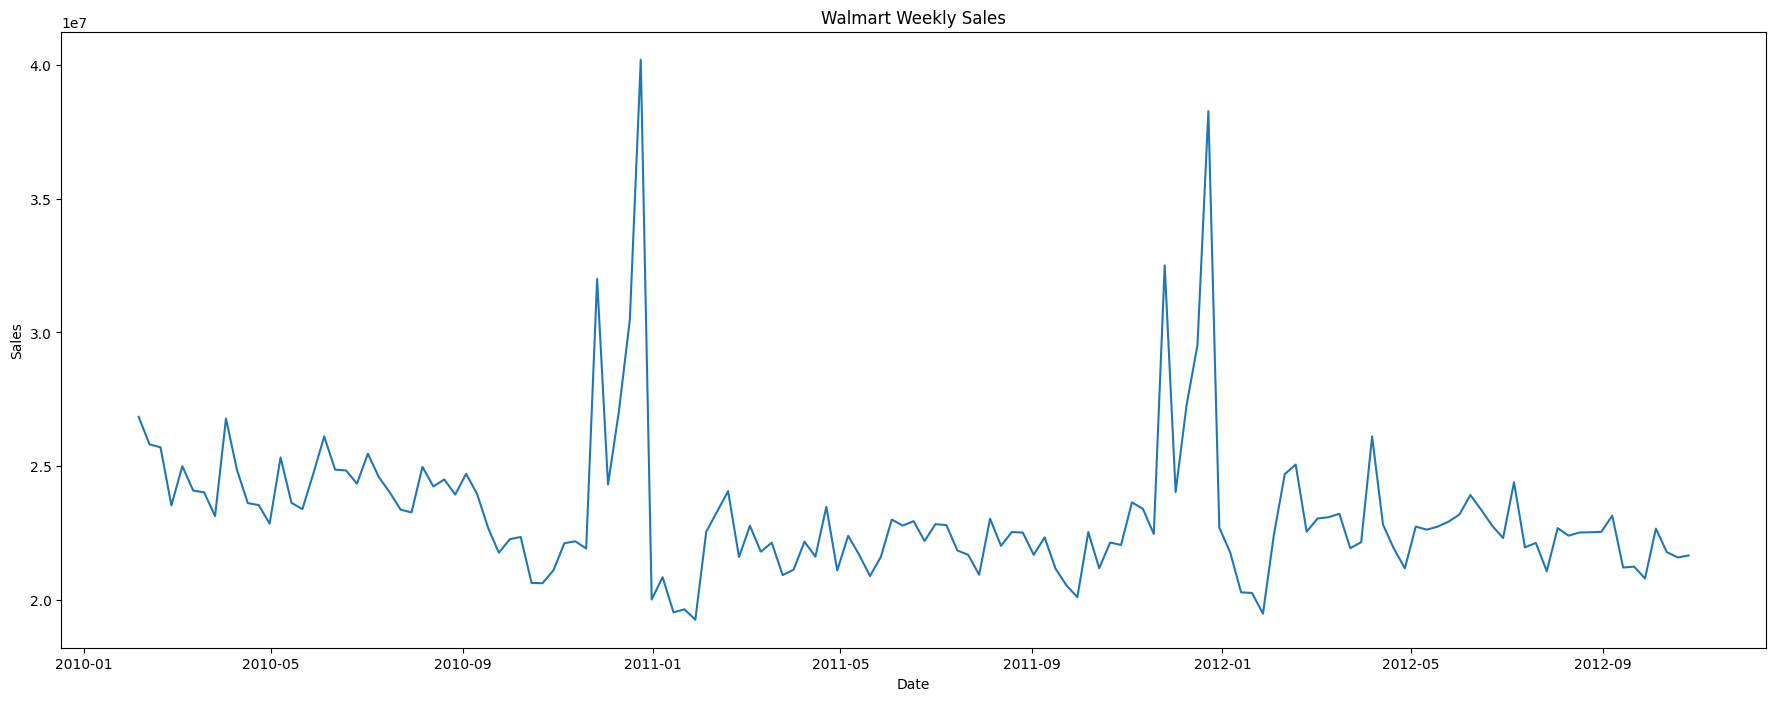

In [37]:
# 전체 매출 추세 확인
plt.figure(figsize=(22, 8))
plt.plot(df_agg.Date2, df_agg.Weekly_Sales)
plt.title('Walmart Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [38]:
# 시계열 분해용 데이터셋 생성
timeSeries_decomp = df_agg.loc[:, ['Date2', 'Weekly_Sales']]
timeSeries_decomp.index = timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop('Date2', axis=1)

ts_decomp.head()

,Weekly_Sales
Date2,
2010-02-05,26842324.87
2010-02-12,25812206.72
2010-02-19,25707151.62
2010-02-26,23530977.13
2010-03-05,24998365.51


<Figure size 640x480 with 0 Axes>

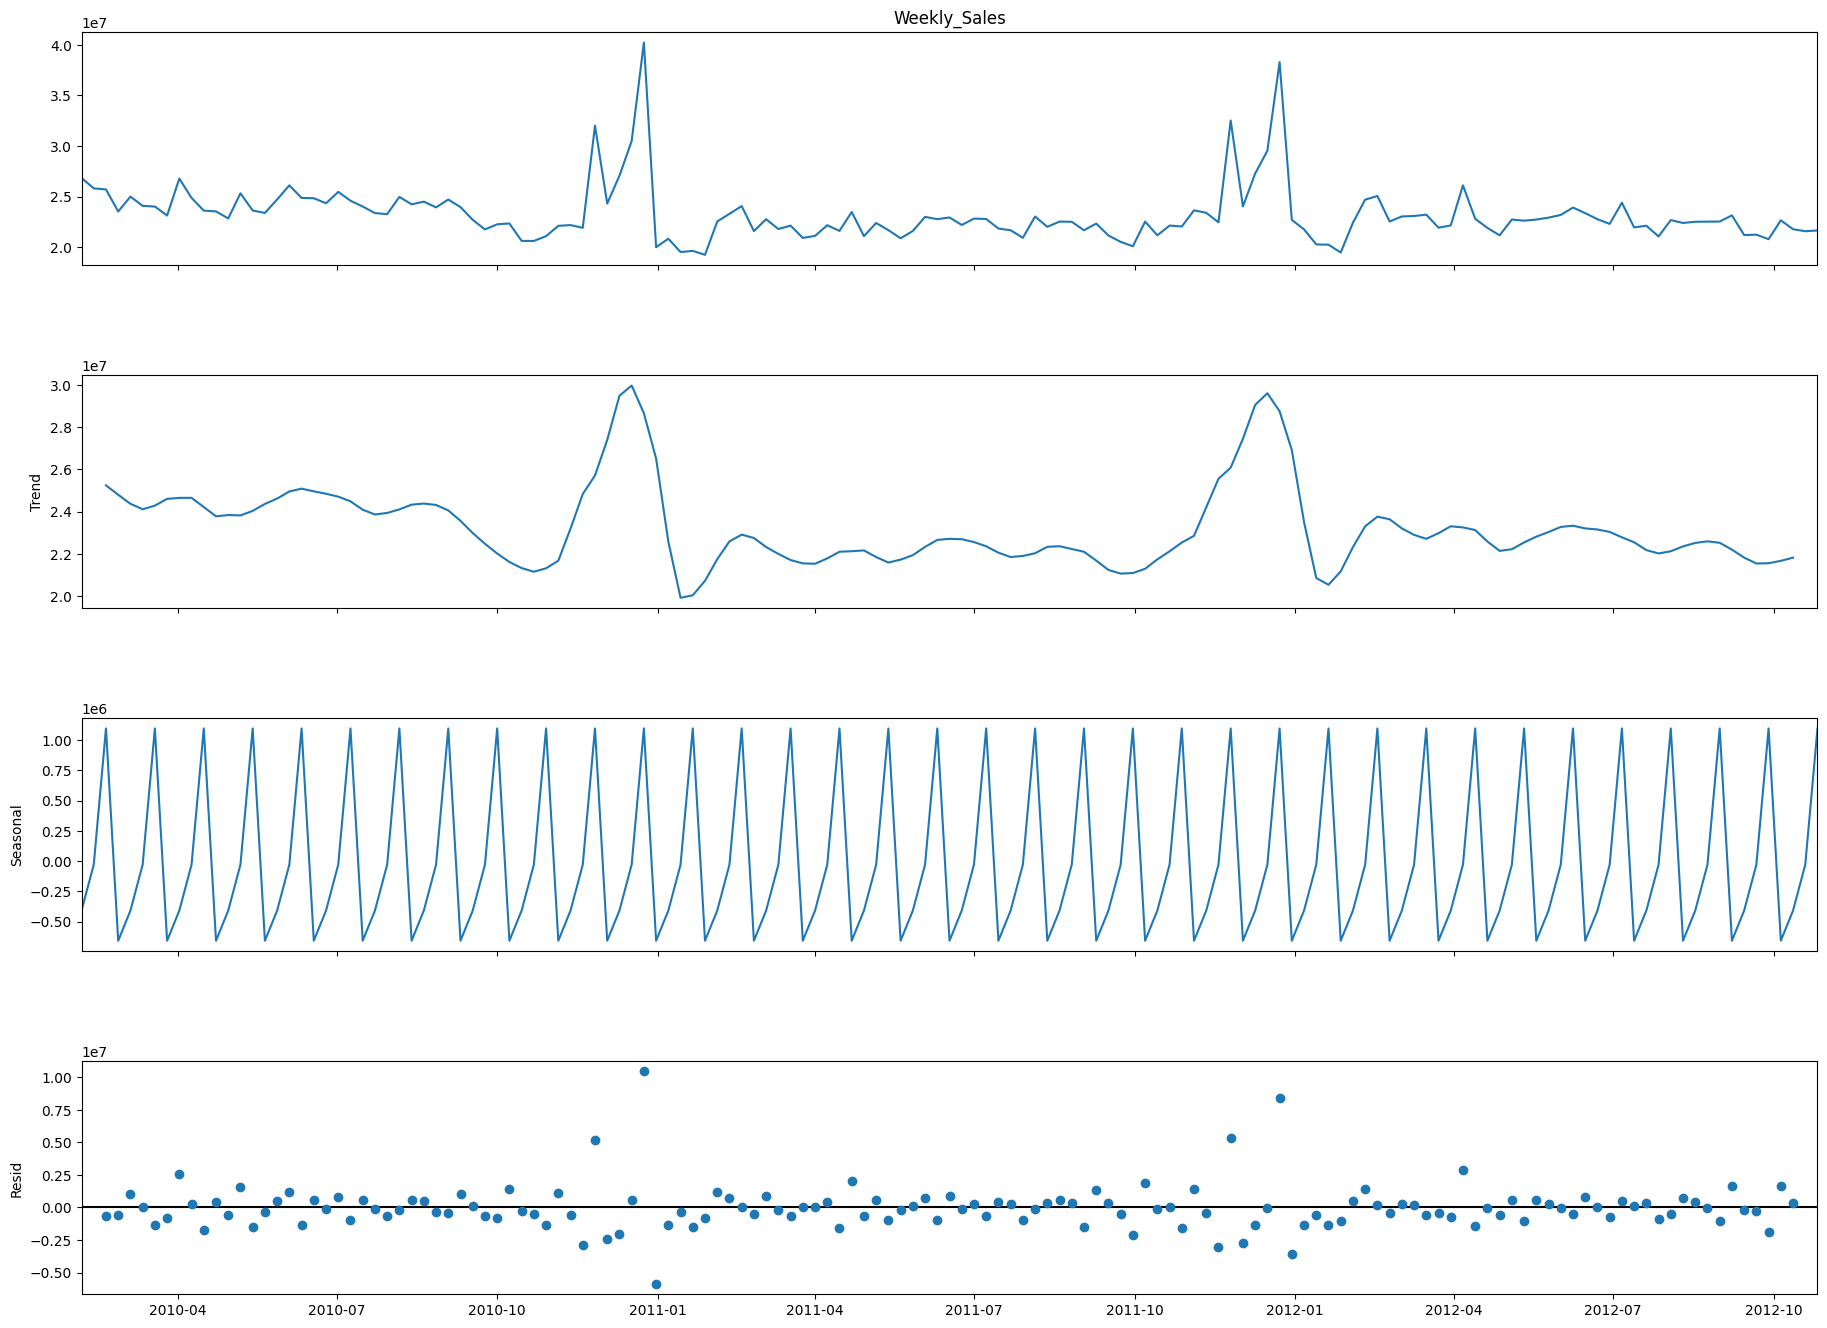

In [39]:
# 시계열 분해 시각화

# period= 월별은 12, 주별은 4, 일별은 7
decomp = seasonal_decompose(ts_decomp['Weekly_Sales'], model='additive', period=4)

fig = plt.figure()
fig = decomp.plot()
fig.set_size_inches(20, 15)
plt.show()

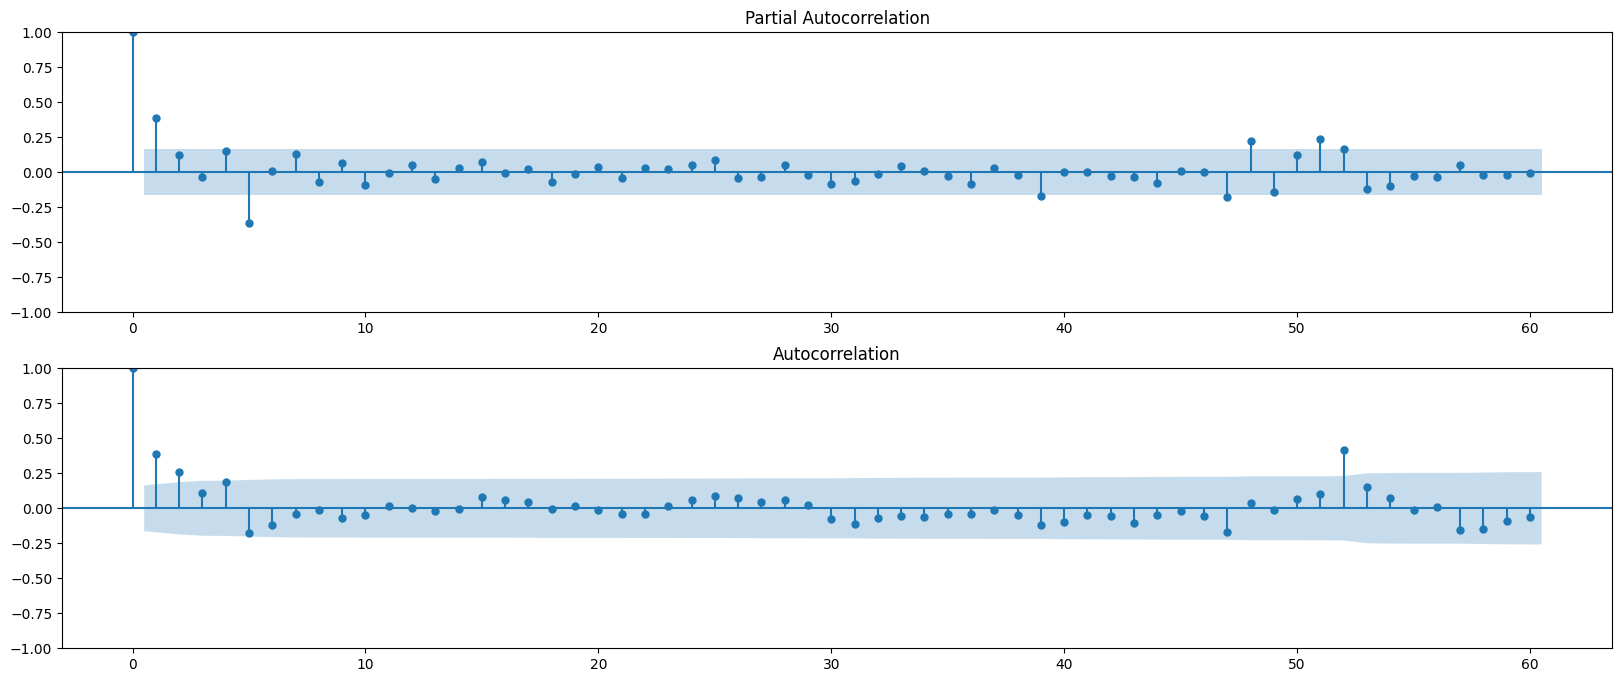

In [40]:
# ACF, PACF 그래프 시각화

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp, lags=60, ax=ax1)

ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_decomp, lags=60, ax=ax2)

시차별 영향력을 확인하기 위해 ACF와 PACF 분석을 시행.

1주 전의 영향력이 약간 있는 것으로 보이며, 1년 주기인 52주 부근에서 높은 영향력이 나타나는 것을 알 수 있다.

**따라서, 회귀 모델을 만들 때에는 전 주의 매출액과 전 해 동일 시기의 매출액이 중요한 변수일 것으로 판단.**

In [41]:
# 회귀 모델용 데이터셋 가공
# 1~4, 52주 전 시점 패생변수 생성
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)

# 모델용 데이터셋 기간 설정
df_agg_set = df_agg[df_agg['Date2'].isin(pd.date_range('2011-02-05', '2012-10-26'))]

# 독립변수, 종속변수 분리
df_x = df_agg_set.drop(['Year', 'Date2', 'Weekly_Sales'], axis=1)
df_y = df_agg_set[['Weekly_Sales']]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=1)

print(len(x_train))
print(len(x_test))

54
36


In [42]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

# 모델 성능 확인
# 학습셋 R^2
print(round(mreg.score(x_train, y_train), 5))
# 테스트셋 R^2
print(round(mreg.score(x_test, y_test), 5))

0.79819
0.85102


**과소적합**

모델 성능을 높이기 위해서는 보다 효과적인 파생변수들을 찾아내고 변수의 영향력을 분석하는 등의 과정이 필요하다.

In [43]:
# 모델 상세 확인
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     17.01
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.66e-12
Time:                        14:54:04   Log-Likelihood:                -795.72
No. Observations:                  54   AIC:                             1613.
Df Residuals:                      43   BIC:                             1635.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.332e+08   4.65e+07     -2.862      0.006   -2.27e+08   -3.94e+07
Temperature      -7264.0822   7834.873     -0.927      0.359   -2.31e+04    8536.445
Fuel_Price       -1.074e+06   5.62e+05     -1.909      0.063   -2.21e+06    6.06e+04
IsHoliday         2.908e+05   4.19e+05      0.694      0.492   -5.55e+05    1.14e+06
CPI               7.268e+05   2.21e+05      3.289      0.002    2.81e+05    1.17e+06
Unemployment      1.722e+06   1.18e+06      1.456      0.153   -6.63e+05    4.11e+06
Weekly_Sales_1w      0.1279      0.061      2.096      0.042       0.005       0.251
Weekly_Sales_2w      0.0249      0.045      0.552      0.584      -0.066       0.116
Weekly_Sales_3w      0.0094      0.046      0.205      0.838      -0.083       0.102
Weekly_Sales_4w     -0.0569      0.080     -0.708      0.483      -0.219       0.105
Weekly_Sales_52w     0.6633      0.068      9.766      0.000       0.526       0.800
==============================================================================
Omnibus:                       10.958   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.104
Skew:                          -0.759   Prob(JB):                      0.00143
Kurtosis:                       4.875   Cond. No.                     2.56e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# ADF 검정
